In [88]:
import numpy as np
import cv2

# Will use matplotlib for showing the image
from matplotlib import pyplot as plt

# Plot inline
%matplotlib inline

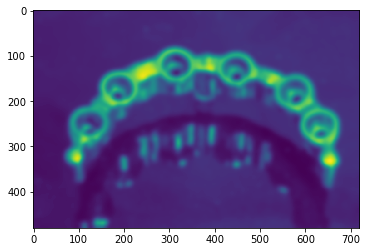

In [89]:
img = cv2.imread('assets/3U4A0136.jpg', 0)

img = cv2.resize(img, (720, 480))

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.GaussianBlur(img, (31, 31), 0)

# Plot blurred image
plt.imshow(img)

### HoughCircles [Documentation](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)

Finds circles in a grayscale image using the Hough transform.

#### Parameters

- image	8-bit, single-channel, grayscale input image.
- circles	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
- method	Detection method, see HoughModes. Currently, the only implemented method is HOUGH_GRADIENT
- dp	Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height.
- minDist	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
- param1	First method-specific parameter. In case of HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
- param2	Second method-specific parameter. In case of HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
- minRadius	Minimum circle radius.
- maxRadius	Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, returns centers without finding the radius.



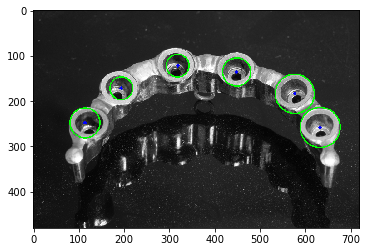

In [90]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=37, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0], i[1]), 2, (0, 0, 255), 3)
plt.imshow(cimg)